# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [223]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [224]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [225]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [226]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [227]:
# Extract all rows of data
mars_data = soup.find('tbody')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [228]:
# Create an empty list
th_headers = []
td_data = []
# Loop through the scraped data to create a list of rows
# Extracting headers.
th_headers.append([th.text for th in mars_data.find_all('th')])
# Extracting rows of data.
for tr in mars_data.find_all('tr', class_='data-row'):
    row = [td.text for td in tr.find_all('td')]
    td_data.append(row)

In [229]:
th_headers

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']]

In [230]:
td_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [231]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(td_data, columns= th_headers)



In [232]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [233]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [234]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype('int64')
mars_df['sol'] = mars_df['sol'].astype('int64')
mars_df['ls'] = mars_df['ls'].astype('int64')
mars_df['month'] = mars_df['month'].astype('int64')
mars_df['min_temp'] = mars_df['min_temp'].astype('float')
mars_df['pressure'] = mars_df['pressure'].astype('float') 


In [235]:
# Manipulating dataframe for dates to get to_datetime function to perform.
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'].squeeze().tolist())

In [236]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [237]:
# 1. How many months are there on Mars?
import numpy as np
mars_months = np.unique(mars_df['month'])
mars_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [238]:
# 2. How many Martian days' worth of data are there?
max_sol = mars_df['sol'].max()
max_sol

sol    1977
dtype: int64

In [239]:
# 3. What is the average low temperature by month?
#month'])[min_temp].mean()
mars_df.columns = mars_df.columns.get_level_values(0)

In [240]:
temp_df = mars_df.groupby(['month'])['min_temp'].mean()
temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

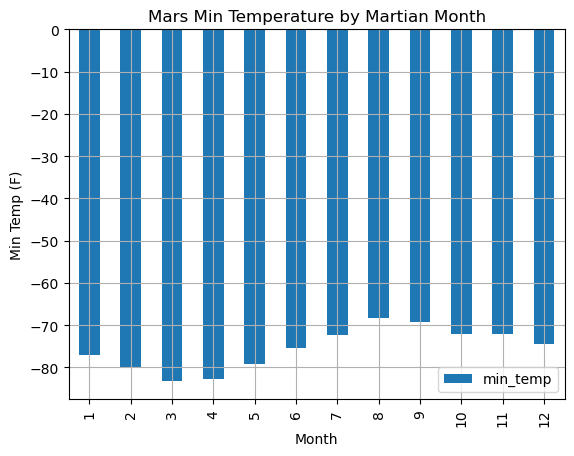

In [241]:
# Plot the average temperature by month
#temp_df.plot.bar(x="min_temp", y="month")
#plt.show()
temp_df.plot.bar(x="min_temp", y="month")
plt.title("Mars Min Temperature by Martian Month")
plt.ylabel("Min Temp (F)")
plt.xlabel("Month")
plt.grid(True)
#Add a legend
plt.legend()

In [242]:
# Identify the coldest and hottest months in Curiosity's location
temp_df.sort_values(ascending=True)

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [243]:
# 4. Average pressure by Martian month
pressure_df = mars_df.groupby(['month'])['pressure'].mean()
pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

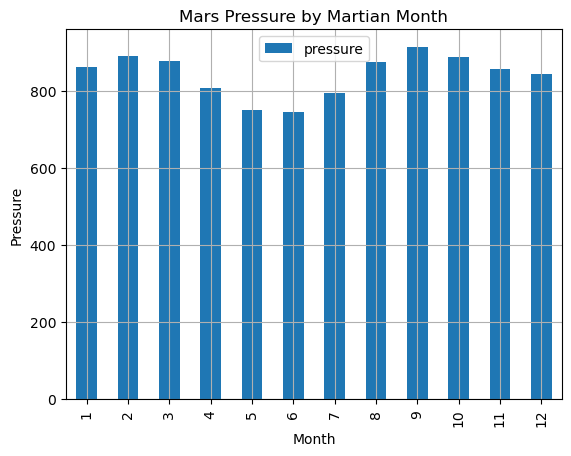

In [244]:
# Plot the average pressure by month
pressure_df.plot.bar(x="pressure", y="month")
plt.title("Mars Pressure by Martian Month")
plt.ylabel("Pressure")
plt.xlabel("Month")
plt.grid(True)
#Add a legend
plt.legend()

In [245]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#Martian day = 24.66 hours according to: https://en.wikipedia.org/wiki/Timekeeping_on_Mars

# Number of Martian/terrestrial days included in the dataset
sol_range = mars_df['sol'].max() - mars_df['sol'].min()
tday_range = (mars_df['terrestrial_date'].max() - mars_df['terrestrial_date'].min()).days
# Calculate length of martian year 
sols = 0
for mm in mars_months:
    sol_duration = mars_df.loc[mars_df['month'] == mm, 'sol'].max() - mars_df.loc[mars_df['month'] == mm, 'sol'].min()
    sols += (sol_duration / 24.66)
mars_year = sol_range/sols
# Now we know how many martian years are in dataset, we can divide it from the range.
print(f'Mars sols in a Martian year (average estimate): {sol_range/mars_year:.2f}')
print(f'Number of earth days in Martian year (average estimate): {tday_range/mars_year:.2f}')

Mars sols in a Martian year (average estimate): 675.71
Number of earth days in Martian year (average estimate): 694.26


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [247]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [ ]:
browser.quit()